<a href="https://colab.research.google.com/github/laussin86/laussin86/blob/main/Loan_Default_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sn
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

In [272]:
#1. Check the datatypes of the attributes.
df = pd.read_csv('accepted_2007_to_2018Q4.csv',
                 usecols=['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
                          'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
                          'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',"addr_state",
                          'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
                          'revol_util', 'total_acc', 'initial_list_status', 'application_type',
                          'mort_acc', 'pub_rec_bankruptcies'])
print(df.dtypes)

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
dtype: object


In [273]:
#2. Are there any missing values in the dataset?
df.isnull().sum()

loan_amnt                   27
term                        28
int_rate                    28
installment                 28
grade                       28
sub_grade                   28
emp_title               144602
emp_length              124898
home_ownership              28
annual_inc                  32
verification_status         28
issue_d                     28
loan_status                 28
purpose                     28
title                    17953
addr_state                  28
dti                       1486
earliest_cr_line            57
open_acc                    57
pub_rec                     57
revol_bal                   28
revol_util                1507
total_acc                   57
initial_list_status         28
application_type            28
mort_acc                 50058
pub_rec_bankruptcies      1393
dtype: int64

In [274]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,1947725.0,15118.147351,9150.709814,500.00,8000.00,13000.00,20000.00,4.000000e+04
int_rate,1947724.0,13.044880,4.802223,5.31,9.44,12.62,15.99,3.099000e+01
installment,1947724.0,446.921334,265.081767,4.93,254.56,380.82,594.00,1.719830e+03
annual_inc,1947720.0,77789.118820,117454.769616,0.00,46000.00,65000.00,93000.00,1.100000e+08
dti,1946266.0,18.827395,14.061978,-1.00,11.90,17.83,24.48,9.990000e+02
open_acc,1947695.0,11.623271,5.619294,0.00,8.00,11.00,14.00,1.010000e+02
pub_rec,1947695.0,0.191830,0.560886,0.00,0.00,0.00,0.00,8.600000e+01
revol_bal,1947724.0,16781.973669,22952.009925,0.00,6028.00,11457.00,20457.00,2.904836e+06
revol_util,1946245.0,50.701458,24.692444,0.00,32.00,50.80,69.80,8.923000e+02
total_acc,1947695.0,24.282436,11.992246,1.00,16.00,22.00,31.00,1.760000e+02


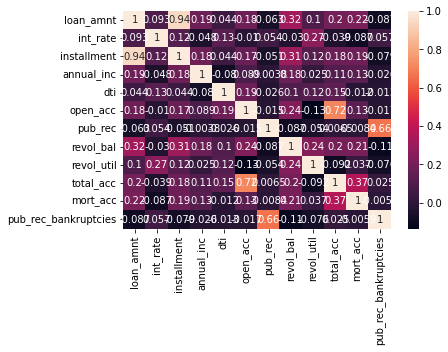

In [275]:
# correlation matrix
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

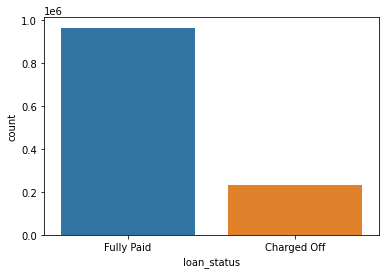

In [276]:
#4. Graph the frequency of loan status with fully paid w/o current and charged off.
df_nocurrent = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]
ax = sns.countplot(x="loan_status",data=df_nocurrent)



In [ ]:
#PREPROCESSING AND EXPLORATORY ANALYSIS

In [279]:
len(df_nocurrent['addr_state'].unique())

51

In [280]:
#create dummies for addr_state
add_state_dum = pd.get_dummies(df_nocurrent['addr_state'], drop_first=True)
add_state_dum


,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947744,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1947745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1947748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1947749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [281]:
#I dropped addr_state and add 'add_state_dum' to df_nocurrent
df = pd.concat([df_nocurrent.drop('addr_state', axis=1), add_state_dum], axis=1)

(array([1.197711e+06, 1.560000e+02, 2.200000e+01, 1.200000e+01,
        1.100000e+01, 8.000000e+00, 8.000000e+00, 6.000000e+00,
        7.000000e+00, 1.000000e+00]),
 array([       0.,  1099920.,  2199840.,  3299760.,  4399680.,  5499600.,
         6599520.,  7699440.,  8799360.,  9899280., 10999200.]),
 <a list of 10 Patch objects>)

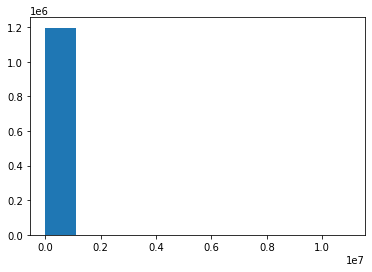

In [282]:
#distribution of annual income
plt.hist(df_nocurrent['annual_inc'])

In [283]:
# salary is highly skewed towards the right so lets find how many people has annual income more than 250,000
len(df_nocurrent[df_nocurrent['annual_inc'] > 250000])

11779

In [285]:
#or in percentage
per=11779*100/len(df_nocurrent) 
per

0.9832696407672492

(array([ 37334., 310100., 377099., 228922., 118725.,  51707.,  30501.,
         14281.,  10092.,   7402.]),
 array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000., 225000., 250000.]),
 <a list of 10 Patch objects>)

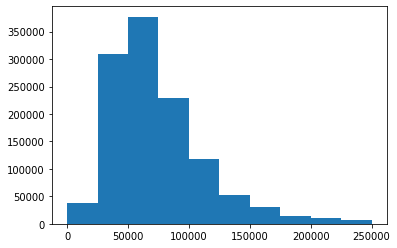

In [286]:
#so 1% so lets drop those outliers and rerun the distribution
df_nocurrent= df_nocurrent[df_nocurrent['annual_inc'] <= 250000]
plt.hist(df_nocurrent['annual_inc'])
#looks better than before

In [287]:
#check if we still have any missing values
df_nocurrent['annual_inc'].isnull().sum()

0

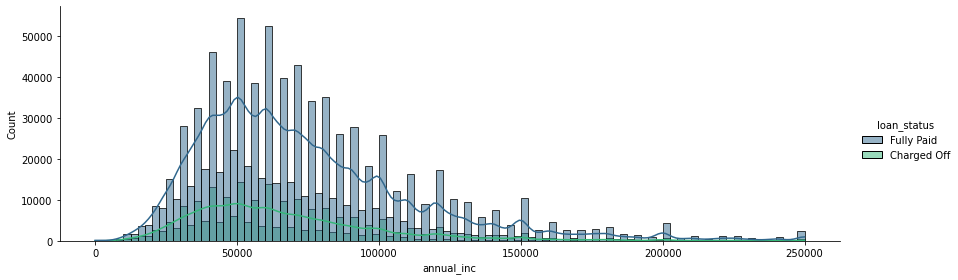

In [288]:
# lets check the annual income of people who paid off their loan vs those charged off.
sns.displot(data=df_nocurrent, x='annual_inc', hue='loan_status', bins=100, height=4, aspect=3, kde=True, palette='viridis');

In [289]:
#let's check the means
df_nocurrent.groupby('loan_status')['annual_inc'].describe()
#the 2 means differ by around $6,000

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,231391.0,67740.994136,35895.741239,0.0,43000.0,60000.0,83000.0,250000.0
Fully Paid,954772.0,73776.684410,38906.750948,0.0,46000.0,65000.0,90400.0,250000.0


In [290]:
df_nocurrent['earliest_cr_line'].head()

0    Aug-2003
1    Dec-1999
2    Aug-2000
4    Jun-1998
5    Oct-1987
Name: earliest_cr_line, dtype: object

In [291]:
#let's keep only the month
df_nocurrent['earliest_cr_line'] = df_nocurrent['earliest_cr_line'].apply( lambda date : int(date[-4:]))

In [292]:
df_nocurrent['earliest_cr_line'].head()

0    2003
1    1999
2    2000
4    1998
5    1987
Name: earliest_cr_line, dtype: int64

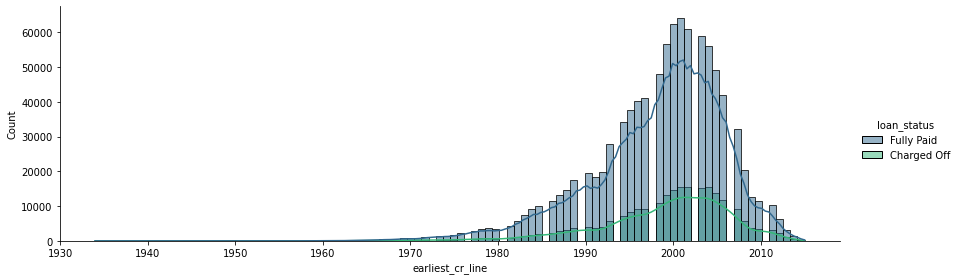

In [293]:
sns.displot(data=df_nocurrent, x='earliest_cr_line', hue='loan_status', bins=100, height=4, aspect=3, kde=True, palette='viridis');

In [294]:
df_nocurrent.groupby('loan_status')['earliest_cr_line'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,231391.0,1999.188555,7.538606,1944.0,1995.0,2001.0,2004.0,2015.0
Fully Paid,954772.0,1998.371908,7.578989,1934.0,1994.0,2000.0,2004.0,2015.0


In [ ]:
# we can see that there is one year difference between those  who paid and  those charged off

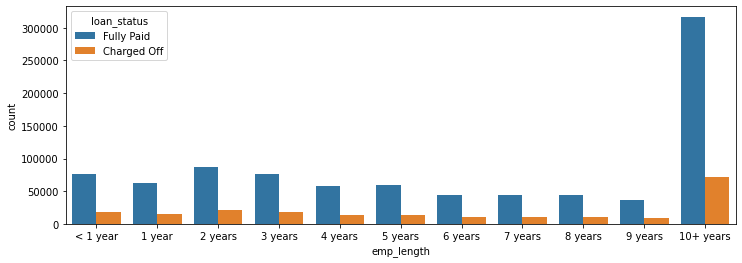

In [295]:
#let's create ascending order for emp_length and check the distribution with fully paid and charged off
emp_length_order = [ '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
plt.figure(figsize=(12,4))
ax = sns.countplot(x="emp_length",data=df_nocurrent,order=emp_length_order,hue='loan_status')

In [296]:
#let check % of people charged off by year
emp_charged_off = df_nocurrent[df_nocurrent['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fully_paid = df_nocurrent[df_nocurrent['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
per_charged_off = (emp_charged_off * 100)/(emp_charged_off + emp_fully_paid)
per_charged_off

emp_length
1 year       20.029824
10+ years    18.405572
2 years      19.333882
3 years      19.499509
4 years      19.296712
5 years      19.111722
6 years      18.981799
7 years      19.245527
8 years      19.608704
9 years      19.698921
< 1 year     19.910933
Name: loan_status, dtype: float64

In [297]:
# we noticed that the percentage is the same through the year and will not make any difference for 
#our predictions so we drop it
df_nocurrent= df_nocurrent.drop('emp_length', axis=1)

In [298]:
df_nocurrent['emp_title'].describe()

count     1110620
unique     350950
top       Teacher
freq        18643
Name: emp_title, dtype: object

In [299]:
#too many unique value so it is better to drop it
df_nocurrent= df_nocurrent.drop('emp_title', axis=1)

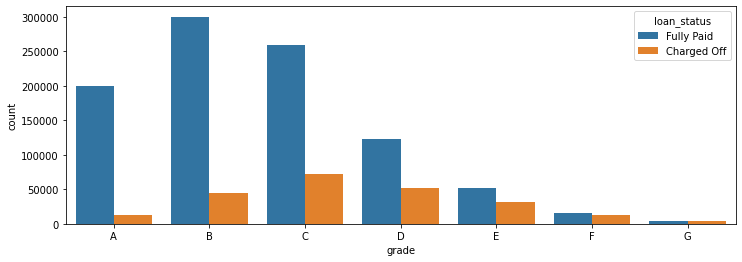

In [300]:
#lets check people grade based on loan status
plt.figure(figsize=(12,4))
ax = sns.countplot(x="grade",data=df_nocurrent,order= sorted(df_nocurrent['grade'].unique()), hue='loan_status')

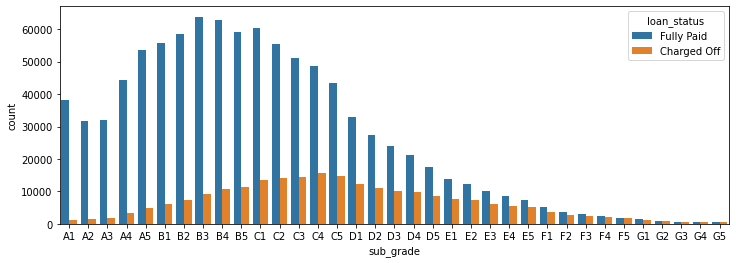

In [301]:
#lets check people sub_grade based on loan status
plt.figure(figsize=(12,4))
ax = sns.countplot(x='sub_grade',data=df_nocurrent,order= sorted(df_nocurrent['sub_grade'].unique()), hue='loan_status')

In [302]:
#information of grade is already on sub grade so let's drop  grade ande create dummies for subgrade
df_nocurrent= df_nocurrent.drop('grade', axis=1)


In [303]:
dummies_sub_grade = pd.get_dummies(df_nocurrent['sub_grade'], drop_first=True)
df_nocurrent = pd.concat([df_nocurrent.drop('sub_grade', axis=1), dummies_sub_grade], axis=1)

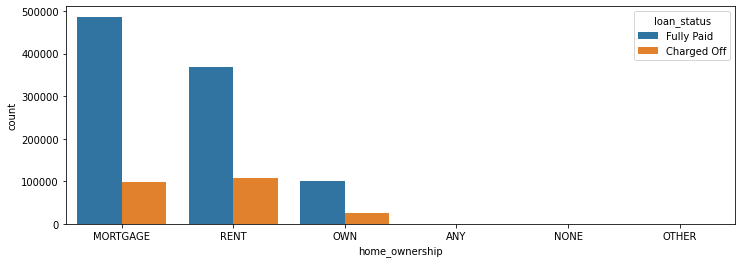

In [304]:
#let's check distribution of home ownership by loan status
plt.figure(figsize=(12,4))
ax = sns.countplot(x="home_ownership",data=df_nocurrent,hue='loan_status')

In [305]:
#since Any,None and other are similar let's put any and none into other
df_nocurrent['home_ownership'] = df_nocurrent['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

MORTGAGE    585624
RENT        474771
OWN         125354
OTHER          414
Name: home_ownership, dtype: int64

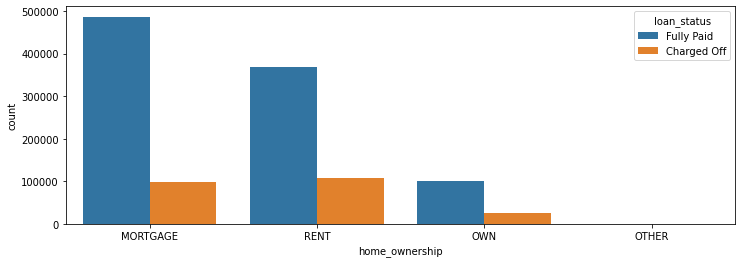

In [306]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x="home_ownership",data=df_nocurrent,hue='loan_status')
df_nocurrent['home_ownership'].value_counts()

In [307]:
# let's check percentage of charged off 
charged_off = df_nocurrent[df_nocurrent['loan_status']=="Charged Off"].groupby("home_ownership").count()['loan_status']
fully_paid = df_nocurrent[df_nocurrent['loan_status']=="Fully Paid"].groupby("home_ownership").count()['loan_status']
perc_charged_off = (charged_off * 100)/(charged_off + fully_paid)
perc_charged_off

home_ownership
MORTGAGE    16.898044
OTHER       17.874396
OWN         20.121416
RENT        22.565616
Name: loan_status, dtype: float64

In [308]:
#visible difference so let's create dummies for the 4 categories and drop the original home ownership
dummies_home_ownership = pd.get_dummies(df_nocurrent['home_ownership'], drop_first=True)
df_nocurrent = pd.concat([df_nocurrent.drop('home_ownership', axis=1), dummies_home_ownership], axis=1)

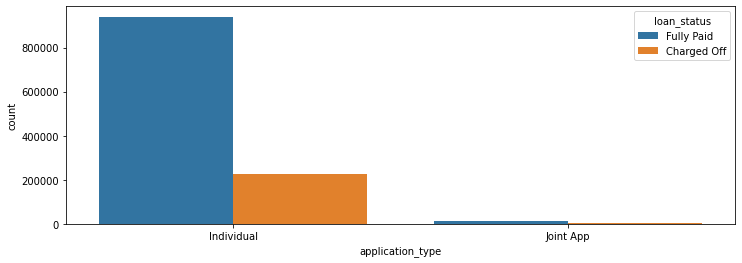

In [309]:
#let's different categories for application types separated by loan_status.
plt.figure(figsize=(12,4))
ax = sns.countplot(x="application_type",data=df_nocurrent,hue='loan_status')


In [310]:
# let's check percentage of charged off 
charged_off = df_nocurrent[df_nocurrent['loan_status']=="Charged Off"].groupby("application_type").count()['loan_status']
fully_paid = df_nocurrent[df_nocurrent['loan_status']=="Fully Paid"].groupby("application_type").count()['loan_status']
perce_charged_off = (charged_off * 100)/(charged_off + fully_paid)
perce_charged_off

application_type
Individual    19.438918
Joint App     23.700058
Name: loan_status, dtype: float64

In [311]:
#visible difference so let's create dummies for the 2 categories and drop the original home ownership
dummies_home_ownership = pd.get_dummies(df_nocurrent['application_type'], drop_first=True)
df_nocurrent = pd.concat([df_nocurrent.drop('application_type', axis=1), dummies_home_ownership], axis=1)

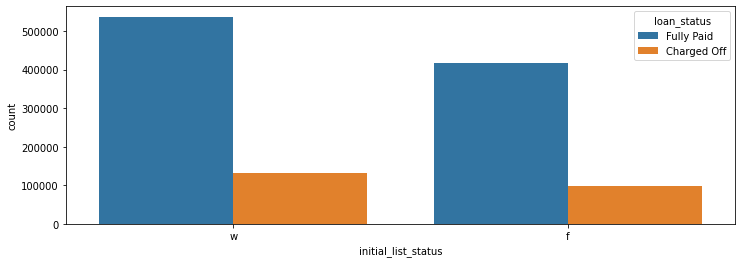

In [312]:
#let's different categories for initial list status types separated by loan_status.
plt.figure(figsize=(12,4))
ax = sns.countplot(x="initial_list_status",data=df_nocurrent,hue='loan_status')

In [313]:
charged_off = df_nocurrent[df_nocurrent['loan_status']=="Charged Off"].groupby("initial_list_status").count()['loan_status']
fully_paid = df_nocurrent[df_nocurrent['loan_status']=="Fully Paid"].groupby("initial_list_status").count()['loan_status']
percen_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percen_charged_off

initial_list_status
f    19.253952
w    19.703515
Name: loan_status, dtype: float64

In [314]:
#no big difference so we can drop it
df_nocurrent= df_nocurrent.drop('initial_list_status', axis=1)

In [315]:
df_nocurrent.groupby('loan_status')['int_rate'].describe()
#clear difference between mean  charged off and fully paid so we keep it.

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,231391.0,15.631180,4.804032,5.31,12.29,15.05,18.49,30.99
Fully Paid,954772.0,12.570658,4.479265,5.31,9.17,12.18,15.31,30.99


In [316]:
df_nocurrent.groupby('loan_status')['loan_amnt'].describe()
#clear difference between mean  charged off and fully paid so we keep it.

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,231391.0,15508.265771,8689.24429,900.0,9000.0,14350.0,20125.0,40000.0
Fully Paid,954772.0,14057.816997,8522.09226,500.0,7500.0,12000.0,20000.0,40000.0


In [317]:
#check missing value
df_nocurrent['mort_acc'].isnull().sum()

46928

In [318]:
df_nocurrent['mort_acc'].describe()
#majority of people have between 1 and 3 account and mean is 1.67 so i will fill missing value with 2

count    1.139235e+06
mean     1.673264e+00
std      2.003855e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.100000e+01
Name: mort_acc, dtype: float64

In [319]:
df_nocurrent['mort_acc'] = df_nocurrent['mort_acc'].fillna(2)

In [320]:
df_nocurrent['mort_acc'].isnull().sum()

0

In [321]:
df_nocurrent.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,231391.0,1.404791,1.814473,0.0,0.0,1.0,2.0,29.0
Fully Paid,954772.0,1.754388,1.993620,0.0,0.0,1.0,3.0,51.0


In [322]:
#we notice some outliers so let drop people  with mort_acc > 10.
df_nocurrent = df_nocurrent[df_nocurrent['mort_acc'] < 11]

In [323]:
df_nocurrent.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,231081.0,1.389599,1.764977,0.0,0.0,1.0,2.0,10.0
Fully Paid,952604.0,1.729115,1.918254,0.0,0.0,1.0,3.0,10.0


In [324]:
#check missing value
df_nocurrent['total_acc'].isnull().sum()

0

In [325]:
df_nocurrent['total_acc'].describe()
#majority of people have between 23 and 32 account and mean is 24.9 so i will fill missing value with 25

count    1.183685e+06
mean     2.495977e+01
std      1.191955e+01
min      2.000000e+00
25%      1.600000e+01
50%      2.300000e+01
75%      3.200000e+01
max      1.760000e+02
Name: total_acc, dtype: float64

In [326]:
df_nocurrent['total_acc'] = df_nocurrent['total_acc'].fillna(25)

In [327]:
df_nocurrent['total_acc'].isnull().sum()

0

In [328]:
df_nocurrent.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,231081.0,24.814104,12.084840,2.0,16.0,23.0,32.0,176.0
Fully Paid,952604.0,24.995102,11.878839,2.0,16.0,23.0,32.0,162.0


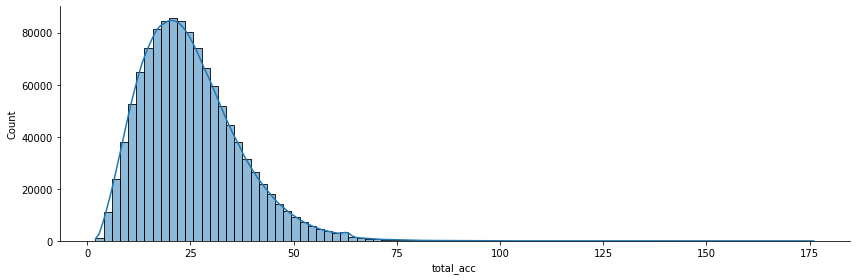

In [329]:
sns.displot(data=df_nocurrent, x='total_acc', bins=88, height=4, aspect=3, kde=True, palette='viridis');

In [330]:
#we notice some outliers so let drop people  with total_acc > 63.
df_nocurrent = df_nocurrent[df_nocurrent['total_acc'] < 64]

In [331]:
df_nocurrent.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,229566.0,24.496367,11.439625,2.0,16.0,23.0,31.0,63.0
Fully Paid,947257.0,24.727182,11.339198,2.0,16.0,23.0,32.0,63.0


In [336]:
# pretty similar so drop total account
df_nocurrent = df_nocurrent.drop('total_acc', axis=1)

In [337]:
df_nocurrent['open_acc'].isnull().sum()

0

In [338]:
df_nocurrent['open_acc'].describe()
#majority of people have between 11 and 14 account and mean is 11.7 so i will fill missing value with 13

count    1.176823e+06
mean     1.147618e+01
std      5.260690e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.400000e+01
max      5.800000e+01
Name: open_acc, dtype: float64

In [339]:
df_nocurrent['open_acc'] = df_nocurrent['open_acc'].fillna(13)

In [340]:
df_nocurrent.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,229566.0,11.811640,5.430212,0.0,8.0,11.0,15.0,52.0
Fully Paid,947257.0,11.394888,5.215534,0.0,8.0,10.0,14.0,58.0


In [ ]:
#difference so we keep open account 

In [341]:
df_nocurrent['pub_rec'].isnull().sum()

0

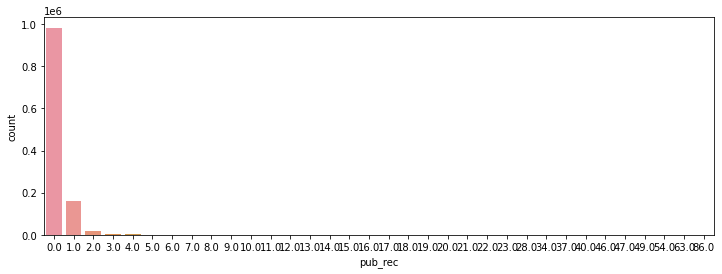

In [342]:
# distribution for public records
plt.figure(figsize=(12,4))
ax = sns.countplot(x="pub_rec",data=df_nocurrent)

In [343]:
# we can notice that there is some outliers and majority of values are from 2 and below so we will
# drop value more than 2
df_nocurrent= df_nocurrent[df_nocurrent['pub_rec'] < 3]

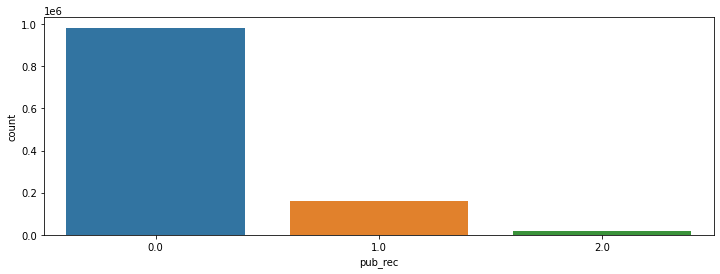

In [344]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x="pub_rec",data=df_nocurrent)

In [345]:
df_nocurrent.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,227164.0,0.200322,0.449920,0.0,0.0,0.0,0.0,2.0
Fully Paid,938913.0,0.168967,0.417407,0.0,0.0,0.0,0.0,2.0


In [ ]:
# difference between mean so keeping public records.

In [346]:
df_nocurrent['pub_rec_bankruptcies'].isnull().sum()

688

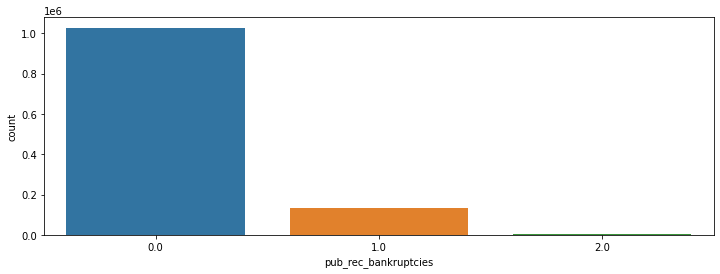

In [347]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x="pub_rec_bankruptcies",data=df_nocurrent)

In [348]:
df_nocurrent.groupby('loan_status')['pub_rec_bankruptcies'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,227048.0,0.140468,0.365209,0.0,0.0,0.0,0.0,2.0
Fully Paid,938341.0,0.118929,0.337745,0.0,0.0,0.0,0.0,2.0


In [349]:
#public record and Public record bankrupcies are highly corroleted so we can drop Public record bankrupcies
df_nocurrent= df_nocurrent.drop('pub_rec_bankruptcies', axis=1)

In [350]:
# check missing values
df_nocurrent['purpose'].isnull().sum()

0

In [351]:
#check unique values
df_nocurrent['purpose'].describe()

count                1166077
unique                    14
top       debt_consolidation
freq                  678062
Name: purpose, dtype: object

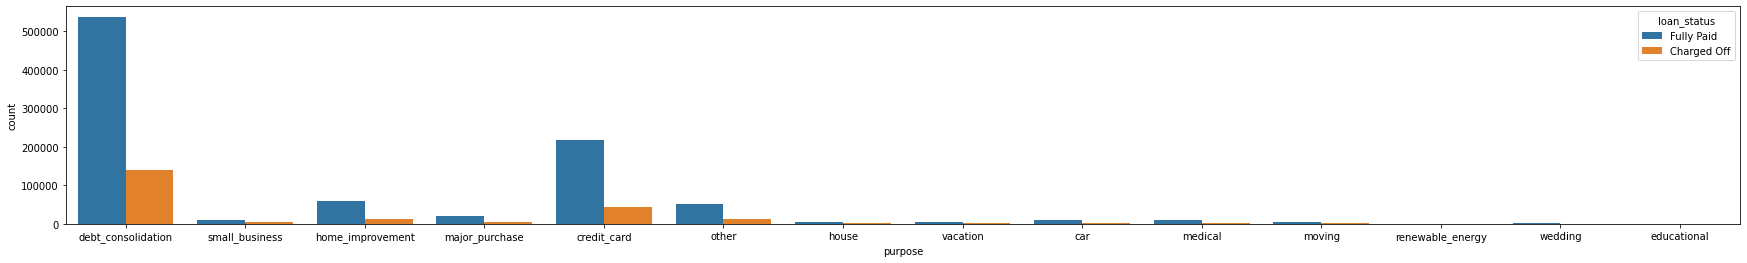

In [352]:
plt.figure(figsize=(30,4))
ax = sns.countplot(x="purpose",data=df_nocurrent,hue='loan_status')

In [353]:
charged_off = df_nocurrent[df_nocurrent['loan_status']=="Charged Off"].groupby("purpose").count()['loan_status']
fully_paid = df_nocurrent[df_nocurrent['loan_status']=="Fully Paid"].groupby("purpose").count()['loan_status']
percent_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percent_charged_off

purpose
car                   14.186824
credit_card           16.477518
debt_consolidation    20.673626
educational           17.283951
home_improvement      17.293459
house                 21.263300
major_purchase        17.842141
medical               21.248664
moving                23.110393
other                 20.652829
renewable_energy      22.802548
small_business        28.945161
vacation              18.931975
wedding               12.208021
Name: loan_status, dtype: float64

In [354]:
#clear difference between values so keep it.
dummies_purpose = pd.get_dummies(df_nocurrent['purpose'], drop_first=True)
df_nocurrent = pd.concat([df_nocurrent.drop('purpose', axis=1), dummies_purpose], axis=1)

In [355]:
# check missing values
df_nocurrent['term'].isnull().sum()

0

In [356]:
#check unique values
df_nocurrent['term'].describe()

count        1166077
unique             2
top        36 months
freq          883242
Name: term, dtype: object

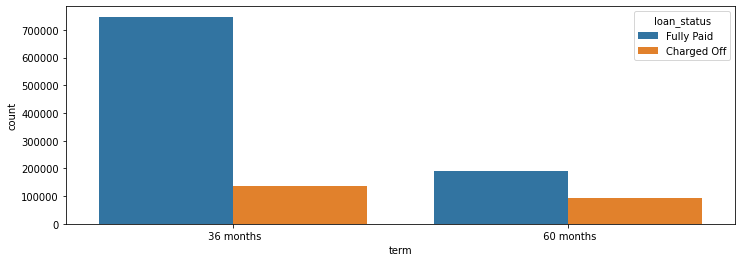

In [357]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x="term",data=df_nocurrent,hue='loan_status')

In [358]:
charged_off = df_nocurrent[df_nocurrent['loan_status']=="Charged Off"].groupby("term").count()['loan_status']
fully_paid = df_nocurrent[df_nocurrent['loan_status']=="Fully Paid"].groupby("term").count()['loan_status']
percenta_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percenta_charged_off

term
 36 months    15.363400
 60 months    32.339703
Name: loan_status, dtype: float64

In [359]:
#clear difference between values so keep it.
dummies_term = pd.get_dummies(df_nocurrent['term'], drop_first=True)
df_nocurrent = pd.concat([df_nocurrent.drop('term', axis=1), dummies_term], axis=1)

In [360]:
dummies_term

,60 months
0,0
1,0
2,1
4,1
5,0
...,...
1947744,0
1947745,0
1947748,1
1947749,0


In [361]:
#check unique values
df_nocurrent['title'].describe()

count                1153060
unique                 61136
top       Debt consolidation
freq                  562208
Name: title, dtype: object

In [362]:
#too many unique values so dropping it
df_nocurrent = df_nocurrent.drop('title', axis=1)

In [363]:
# check missing values
df_nocurrent['revol_bal'].isnull().sum()

0

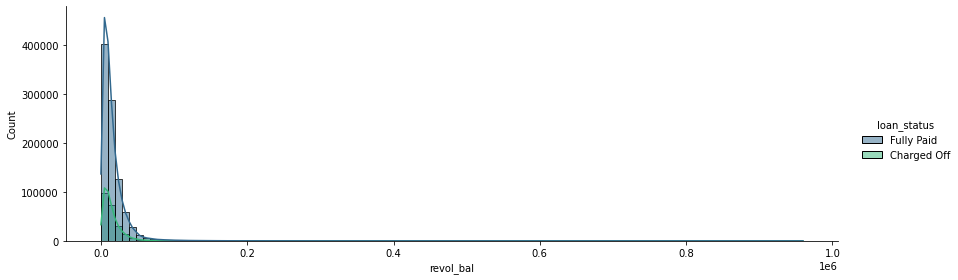

In [364]:
#check distribution based on loan status
sns.displot(data=df_nocurrent, x='revol_bal', hue='loan_status', bins=100, height=4, aspect=3, kde=True, palette='viridis');

In [365]:
#let check percentage rows after 100,000
len(df_nocurrent[df_nocurrent['revol_bal'] > 100000]) * 100 / len(df_nocurrent)

0.7344283439258299

In [228]:
#So less than 1% so drop values more than 100,000
df_nocurrent= df_nocurrent[df_nocurrent['revol_bal'] < 100001]

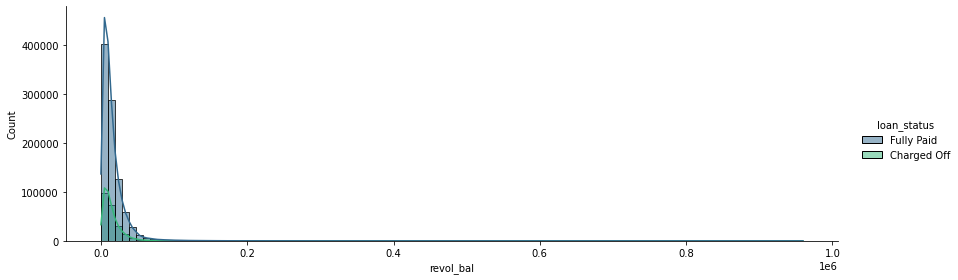

In [366]:
sns.displot(data=df_nocurrent, x='revol_bal', hue='loan_status', bins=100, height=4, aspect=3, kde=True, palette='viridis');
# still some outliers but it is better.

In [367]:
df_nocurrent.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,227164.0,15236.046728,16989.963685,0.0,6074.0,11184.0,19233.0,666627.0
Fully Paid,938913.0,16070.432806,19635.130263,0.0,6013.0,11239.0,19909.0,959754.0


In [ ]:
# there is a difference between means so keep it.

In [368]:
# check missing values
df_nocurrent['revol_util'].isnull().sum()

678

In [369]:
df_nocurrent['revol_util'].describe()
#fill missing value with the  mean 52.48693

count    1.165399e+06
mean     5.248693e+01
std      2.440313e+01
min      0.000000e+00
25%      3.430000e+01
50%      5.300000e+01
75%      7.130000e+01
max      8.923000e+02
Name: revol_util, dtype: float64

In [370]:
df_nocurrent['revol_util'] = df_nocurrent['revol_util'].fillna(52.4863)

In [371]:
df_nocurrent['revol_util'].isnull().sum()

0

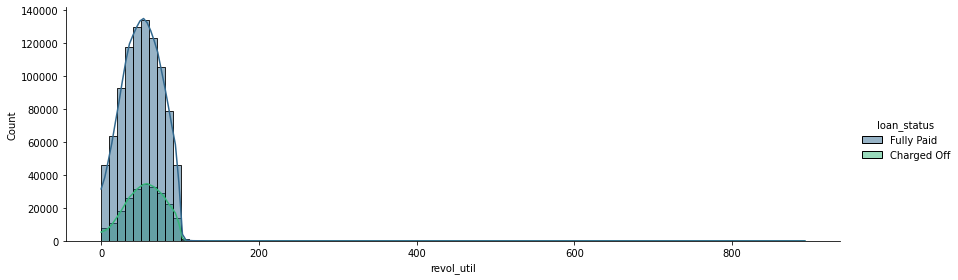

In [372]:
sns.displot(data=df_nocurrent, x='revol_util', hue='loan_status', bins=88, height=4, aspect=3, kde=True, palette='viridis');

In [373]:
#let check percentage rows after 120
len(df_nocurrent[df_nocurrent['revol_util'] > 120]) * 100 / len(df_nocurrent)

0.00874727826721563

In [374]:
# There is some outliers so let's remove all alues more than 100
df_nocurrent= df_nocurrent[df_nocurrent['revol_util'] <121]

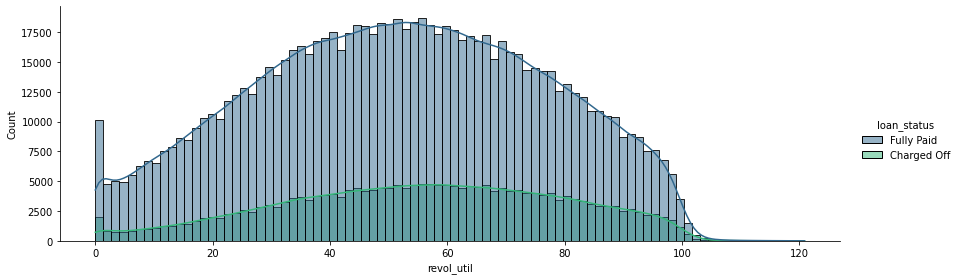

In [375]:
sns.displot(data=df_nocurrent, x='revol_util', hue='loan_status', bins=88, height=4, aspect=3, kde=True, palette='viridis');

In [376]:
df_nocurrent.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,227132.0,55.487361,23.704911,0.0,38.3,56.4,73.8,120.5
Fully Paid,938850.0,51.751573,24.474136,0.0,33.4,52.1,70.7,120.9


In [ ]:
# difference in mean so keep it.

In [377]:
# check missing values
df_nocurrent['verification_status'].isnull().sum()

0

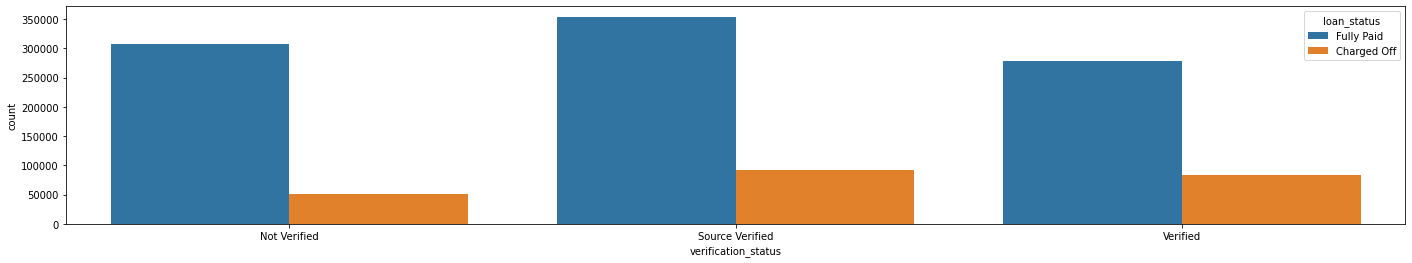

In [378]:
plt.figure(figsize=(24,4))
ax = sns.countplot(x="verification_status",data=df_nocurrent,hue='loan_status')

In [379]:
charged_off = df_nocurrent[df_nocurrent['loan_status']=="Charged Off"].groupby("verification_status").count()['loan_status']
fully_paid = df_nocurrent[df_nocurrent['loan_status']=="Fully Paid"].groupby("verification_status").count()['loan_status']
per_V_charged_off = (charged_off * 100)/(charged_off + fully_paid)
per_V_charged_off

verification_status
Not Verified       14.273978
Source Verified    20.646996
Verified           23.186069
Name: loan_status, dtype: float64

In [380]:
# difference between mean so we keep it.
dummies_verification = pd.get_dummies(df_nocurrent['verification_status'], drop_first=True)
df_nocurrent = pd.concat([df_nocurrent.drop('verification_status', axis=1), dummies_verification], axis=1)

In [381]:
df_nocurrent['issue_d'].head()

0    Dec-2015
1    Dec-2015
2    Dec-2015
4    Dec-2015
5    Dec-2015
Name: issue_d, dtype: object

In [382]:
#let's keep only the month
df_nocurrent['issue_d'] = df_nocurrent['issue_d'].apply( lambda date : int(date[-4:]))

In [383]:
df_nocurrent['issue_d'].head()

0    2015
1    2015
2    2015
4    2015
5    2015
Name: issue_d, dtype: int64

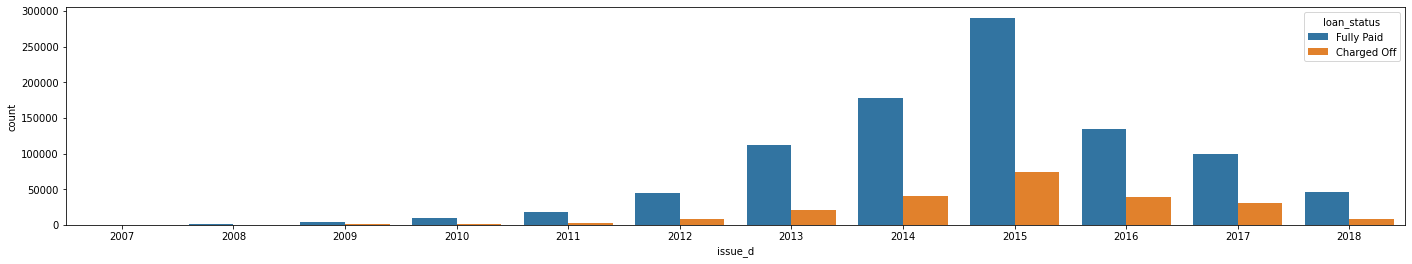

In [384]:
#distribution for issue date based loan status
plt.figure(figsize=(24,4))
ax = sns.countplot(x="issue_d",data=df_nocurrent,hue='loan_status')

In [385]:
df_nocurrent.groupby('loan_status')['issue_d'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,227132.0,2014.969022,1.579641,2007.0,2014.0,2015.0,2016.0,2018.0
Fully Paid,938850.0,2014.766854,1.692234,2007.0,2014.0,2015.0,2016.0,2018.0


In [386]:
#mean are almost the same so we will drop Issue date
df_nocurrent = df_nocurrent.drop('issue_d', axis=1)

In [387]:
# check missing values
df_nocurrent['dti'].isnull().sum()

290

In [388]:
df_nocurrent['dti'].describe()

count    1.165692e+06
mean     1.834223e+01
std      1.075405e+01
min     -1.000000e+00
25%      1.190000e+01
50%      1.769000e+01
75%      2.409000e+01
max      9.990000e+02
Name: dti, dtype: float64

In [389]:
#fill missing value with the  mean 18.34223
df_nocurrent['dti'] = df_nocurrent['dti'].fillna(18.34223)

In [390]:
df_nocurrent['dti'].isnull().sum()

0

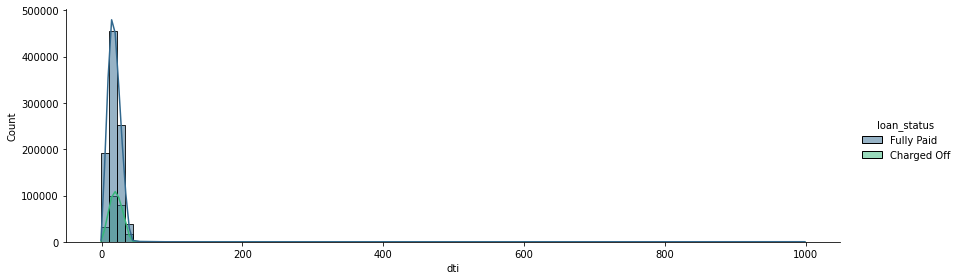

In [391]:
sns.displot(data=df_nocurrent, x='dti', hue='loan_status', bins=88, height=4, aspect=3, kde=True, palette='viridis');

In [392]:
#there is some outliers so let remove values more than 150.
len(df_nocurrent[df_nocurrent['dti'] > 150]) * 100 / len(df_nocurrent)

0.017924805014142585

In [393]:
df_nocurrent= df_nocurrent[df_nocurrent['dti'] <151]

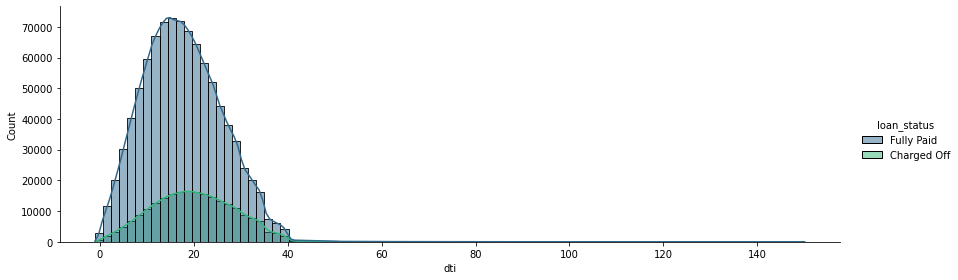

In [394]:
sns.displot(data=df_nocurrent, x='dti', hue='loan_status', bins=88, height=4, aspect=3, kde=True, palette='viridis');

In [395]:
df_nocurrent.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,227094.0,20.183036,9.072289,0.0,13.68,19.85,26.38,150.05
Fully Paid,938680.0,17.814644,8.574750,-1.0,11.55,17.19,23.49,149.10


In [ ]:
#there is differences between means so we keep it.

In [396]:
# I have done all features so let's dummy the predict feature loan status.
dummies_loan_status = pd.get_dummies(df_nocurrent['loan_status'], drop_first=True)
df_nocurrent = pd.concat([df_nocurrent.drop('loan_status', axis=1), dummies_loan_status], axis=1)

In [397]:
dummies_loan_status

,Fully Paid
0,1
1,1
2,1
4,1
5,1
...,...
1947744,0
1947745,1
1947748,1
1947749,1


In [398]:
df_nocurrent.dtypes.value_counts()

uint8      55
float64    10
object      1
int64       1
dtype: int64